## Chapter 12 Exercises

**Exercise 12-1:**   The linear model I used in this chapter has the obvious drawback that it is linear, and there is no reason to expect prices to change linearly over time. We can add flexibility to the model by adding a quadratic term, as we did in Section 11.3.

Use a quadratic model to fit the time series of daily prices, and use the model to generate predictions. You will have to write a version of `RunLinearModel` that runs that quadratic model, but after that you should be able to reuse code from the chapter to generate predictions.

In [44]:
# Original linear model provided by the excercises earlier in the book.
# It creates a function that takes a single parameter and returns a linear regression model with the results.
def RunLinearModel(daily):
    model = smf.ols("ppg ~ years", data=daily)
    results = model.fit()
    return model, results

In [45]:
# This defines a new function that takes a single parameter, it returns a multiple regression model with the results.

def RunQuadraticModel(daily):
    """Runs a linear model of prices versus years.

    daily: DataFrame of daily prices

    returns: model, results
    """
    daily["years2"] = daily.years**2 # This squares the value of number of years from the dataframe 'daily'.
    model = smf.ols("ppg ~ years + years2", data=daily) # The model is a multiple linear regression model, 
    # usisng two explanatory variables, 'years' and 'years2'.
    results = model.fit()
    return model, results

In [46]:
# This sets the string "high" to variable name, then sets the variable daily to the dailies of 'High'.
name = "high"
daily = dailies[name]

# The multiple linear regression model is run on dailies of 'high' (daily).
model, results = RunQuadraticModel(daily)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     371.1
Date:                Sat, 17 Feb 2024   Prob (F-statistic):          5.39e-127
Time:                        10:39:39   Log-Likelihood:                -1689.6
No. Observations:                1241   AIC:                             3385.
Df Residuals:                    1238   BIC:                             3401.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.9783      0.078    179.843      0.000      13.826      14.131
years         -1.1300      0.098    -11.546      0.000      -1.322      -0.938
years2         0.1193      0.026      4.569      0.000       0.068       0.171
==============================================================================
Omnibus:                      120.056   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.961
Skew:                           0.671   Prob(JB):                     2.30e-44
Kurtosis:                       4.445   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

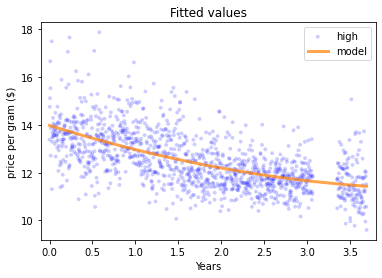

In [47]:
# Using the function PlotFittedValues to plot.
PlotFittedValues(model, results, label=name)
thinkplot.Config(
    title="Fitted values", xlabel="Years", xlim=[-0.1, 3.8], ylabel="price per gram ($)"
)

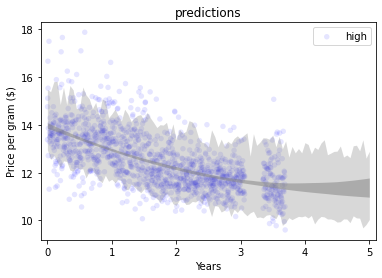

In [48]:
# Creating predictions model using PlotPredictions
years = np.linspace(0, 5, 101) # Set years from 0, 5, with 101 being the seperation between years in days (I think this is true)
thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name) # First a scatter plot is plotted
PlotPredictions(daily, years, func=RunQuadraticModel) # The prediction plot is added 
thinkplot.Config(
    title="predictions",
    xlabel="Years",
    xlim=[years[0] - 0.1, years[-1] + 0.1],
    ylabel="Price per gram ($)",
)

**Exercise 12-2:** Write a definition for a class named `SerialCorrelationTest` that extends `HypothesisTest` from Section 9.2. It should take a series and a lag as data, compute the serial correlation of the series with the given lag, and then compute the p-value of the observed correlation.

Use this class to test whether the serial correlation in raw price data is statistically significant. Also test the residuals of the linear model and (if you did the previous exercise), the quadratic model.

In [49]:
# Quick review of some basic terms in a time series:

# lag is a fixed time displacement; most common used is lag 1

# A permutation is a mathematical technique that determines the number of possible arrangements 
# in a set when the order of the arrangements matters


In [50]:
# Creates a new class called "SerialCorrelationTest" which takes the thinkstats2 HypothesisTest function as a parameter
class SerialCorrelationTest(thinkstats2.HypothesisTest):
    """Tests serial correlations by permutation."""

    # Defines a new function under class that takes data as a parmater
    def TestStatistic(self, data):
        """Computes the test statistic.

        data: tuple of xs and ys
        """
        # Data is defined as a tuple of series and lag
        series, lag = data
        # test_stat is defined as the asbsolute vale of the result of SerailCorrelationTest on series and lag
        test_stat = abs(SerialCorr(series, lag))
        return test_stat

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        series, lag = self.data
        permutation = series.reindex(np.random.permutation(series.index))
        return permutation, lag

In [51]:
# Testing the correlation between consecutive prices

name = "high"
daily = dailies[name]

series = daily.ppg
test = SerialCorrelationTest((series, 1)) # sets 'test' equal to return of SerialCorrelationTest with the series being 
# price per gram from the dataframe daily
pvalue = test.PValue() # Testing P Value
print(test.actual, pvalue)

0.4228751350592442 0.0


In [52]:
# Running Linear Regression Model

# Testing for serial correlation in residuals of the linear model

_, results = RunLinearModel(daily)
series = results.resid
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.09353577616434147 0.001


In [53]:
# Running the Quadtratic Model

# Testing for serial correlation in residuals of the quadratic model

_, results = RunQuadraticModel(daily)
series = results.resid
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.07771611641942909 0.006


In all tests, the p-value appears to be close to zero, indicating statistical significance. 

### Review of the Variables Used

I decided to view the data to try and make better sense of what the functions and class are doing, and how the values were reached. I realize the values I'm looking at are all for the quadratic model above. 

In [60]:
daily

,ppg,date,years,years2
date,,,,
2010-09-02,13.384186,2010-09-02,0.000000,0.000000
2010-09-03,14.760993,2010-09-03,0.002738,0.000007
2010-09-04,15.117919,2010-09-04,0.005476,0.000030
2010-09-05,16.667500,2010-09-05,0.008214,0.000067
2010-09-06,15.537500,2010-09-06,0.010952,0.000120
...,...,...,...,...
2014-05-09,12.020381,2014-05-09,3.682485,13.560695
2014-05-10,11.850046,2014-05-10,3.685223,13.580867
2014-05-11,11.518750,2014-05-11,3.687961,13.601054


In [58]:
series

date
2010-09-02   -0.594142
2010-09-03    0.785758
2010-09-04    1.145775
2010-09-05    2.698445
2010-09-06    1.571533
                ...   
2014-05-09    0.585134
2014-05-10    0.415486
2014-05-11    0.084875
2014-05-12   -0.854899
2014-05-13   -1.827895
Length: 1241, dtype: float64

In [61]:
results

In [57]:
test.data

(date
 2010-09-02   -0.594142
 2010-09-03    0.785758
 2010-09-04    1.145775
 2010-09-05    2.698445
 2010-09-06    1.571533
                 ...   
 2014-05-09    0.585134
 2014-05-10    0.415486
 2014-05-11    0.084875
 2014-05-12   -0.854899
 2014-05-13   -1.827895
 Length: 1241, dtype: float64,
 1)

In [59]:
lag

365